# 5. Geospatial Feature Engineering
## 5. 1 Geometry-based Features
#### 5.1.1 Introduction
The key difference between data stored in a vector geospatial data format and a typical container is the geometry information associated with each record. These geometries can yield numerous features that can be derived using many of the python libraries we have introduced.

In [2]:
# Calculate the centroid of a polygon using GDAL
# Open a shapefile and count the number of features
import os
from osgeo import ogr
shapefile = r"./data/census/stpete_cenacs_2015.shp"
driver = ogr.GetDriverByName('ESRI Shapefile')
cenacs = driver.Open(shapefile, 0)
layer = cenacs.GetLayer()
featureCount = layer.GetFeatureCount()
print(featureCount)

231


In [3]:
# Calculate the centroid of a polygon using Geopandas
import geopandas as gpd
cenacs = gpd.read_file('./data/census/stpete_cenacs_2015.shp')
cenacs.centroid

0      POINT (-82.60354110300548 27.80450215152453)
1      POINT (-82.64063979886336 27.81666814797885)
2      POINT (-82.64371053450526 27.81124574740872)
3      POINT (-82.64084795920371 27.81948766795328)
4      POINT (-82.63767357194939 27.81142977699698)
5      POINT (-82.65091247192447 27.81753881753457)
6      POINT (-82.65929889414028 27.81788971090997)
7      POINT (-82.66263222027207 27.81226399101073)
8      POINT (-82.71714430874859 27.73052834779624)
9      POINT (-82.65812844605504 27.81032319864972)
10     POINT (-82.65091384588304 27.81028175463501)
11     POINT (-82.65105297334668 27.83939782386079)
12     POINT (-82.65101409261301 27.83207574433093)
13     POINT (-82.65094203970979 27.82618534246843)
14     POINT (-82.65092838946209 27.82252418179152)
15     POINT (-82.73965764801859 27.76011785489368)
16      POINT (-82.65682416744534 27.8359506687886)
17     POINT (-82.66162126762909 27.83474669495586)
18     POINT (-82.66021870057909 27.82492139774878)
19     POINT

> *Show centroid calculation and centroids in QGIS*

#### 5.1.2 Size
Size properties of spatial geometries can yield additional features associated with a geometry that can serve as stand alone predictors or as normalization features in areal objects with arbitrary sizes.

In [4]:
# Calculate the area of a polygon using Geopandas
cenacs.area

0      0.000195
1      0.000022
2      0.000055
3      0.000047
4      0.000053
5      0.000059
6      0.000060
7      0.000025
8      0.000604
9      0.000046
10     0.000060
11     0.000061
12     0.000058
13     0.000038
14     0.000022
15     0.000042
16     0.000049
17     0.000086
18     0.000076
19     0.000060
20     0.000058
21     0.000057
22     0.000043
23     0.000071
24     0.000150
25     0.000066
26     0.000031
27     0.000059
28     0.000153
29     0.000320
         ...   
201    0.000045
202    0.000045
203    0.000030
204    0.000032
205    0.000040
206    0.000025
207    0.000032
208    0.000079
209    0.000056
210    0.000031
211    0.000033
212    0.000120
213    0.000030
214    0.000039
215    0.000033
216    0.000087
217    0.000037
218    0.000055
219    0.000060
220    0.000063
221    0.000058
222    0.000234
223    0.000181
224    0.000113
225    0.000061
226    0.000137
227    0.000134
228    0.000206
229    0.000239
230    0.000083
dtype: float64

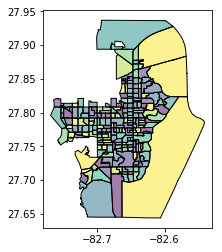

In [5]:
# Reproject a set of polygon features and calculate area in metric units
%matplotlib inline
cenacs.crs
cenacs.plot()

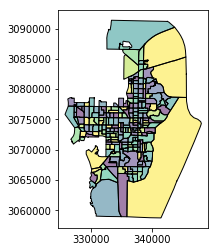

In [6]:
cenacs_albers = cenacs.to_crs({'init': 'epsg:32617'})
cenacs_albers.plot()

In [7]:
cenacs_albers.area/1000

0      2134.032206
1       244.336793
2       605.595091
3       512.065611
4       581.284568
5       647.627897
6       651.701947
7       277.169592
8      6603.281530
9       502.686460
10      649.765484
11      665.570279
12      637.915710
13      410.107141
14      242.065413
15      455.705855
16      539.416323
17      943.234692
18      829.275861
19      652.035575
20      636.944139
21      620.282976
22      474.612251
23      770.962294
24     1639.567838
25      719.448913
26      338.807773
27      647.482917
28     1665.478707
29     3497.187071
          ...     
201     495.181979
202     489.164371
203     327.345689
204     349.558738
205     432.370109
206     274.977689
207     350.388364
208     867.967484
209     611.690611
210     341.797526
211     357.499087
212    1312.839741
213     327.443211
214     421.696368
215     355.558778
216     947.071988
217     400.865755
218     595.692907
219     650.245208
220     685.995362
221     632.518417
222    2553.

#### 5.1.3 Shape

## 5.2 Topologically-based Features
#### 5.2.1 Neighbors and connectivity

#### 5.2.2 Edges

#### 5.2.3 Construction

## 5.3 Set-theoretic Features
#### 5.3.1 Intersection


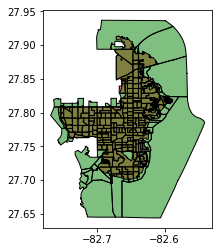

In [9]:
bnd = gpd.read_file('./data/bnd/st_pete_bnd.shp')
ax = bnd.plot(color='red')
cenacs.plot(ax=ax, color='green')

In [10]:
intersect = gpd.overlay(bnd, cenacs, how='intersection')

Ring Self-intersection at or near point -82.6092279946362 27.818164373960659


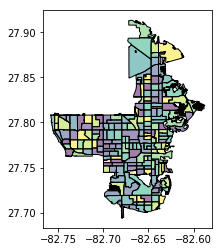

In [11]:
intersect
intersect.plot()